# Exploratory Data Analysis on Cars Sale Price Data 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=[10.0,8.0])
sns.set_palette("Set3",10)
sns.set_palette('bright')

In [2]:
org_data = pd.read_excel('Data_Train (1).xlsx')

In [3]:
data = org_data.copy()
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Total no of cars for sales by location

In [4]:
location = data.groupby('Location').size().sort_values()

In [5]:
location = pd.DataFrame(location)
location = location.sort_values(by = 0,ascending = True)
location = location.rename(columns= {0:'Count'})
location

,Count
Location,
Ahmedabad,224
Bangalore,358
Jaipur,413
Chennai,494
Kolkata,535
Delhi,554
Pune,622
Coimbatore,636
Kochi,651


In [6]:
location.sum()# total no of cars

Count    6019
dtype: int64

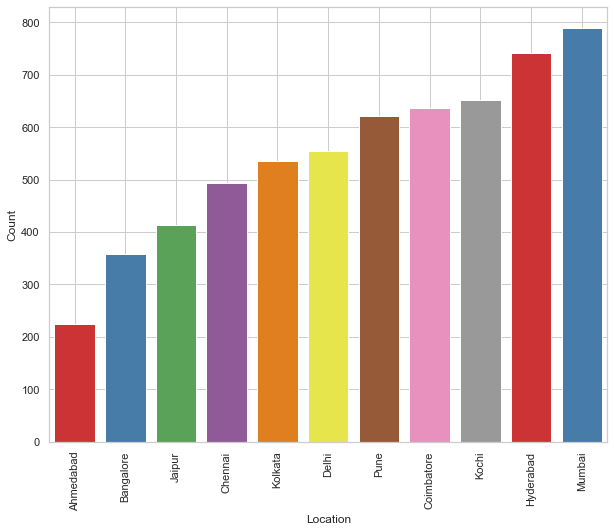

In [71]:
sns.barplot(location.index,location['Count'],palette = 'Set1')#using Seabron
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(10.0,8.0)
plt.grid(True)

Location wise Mumbai has the highest car's for sale 

# Company wise no of cars for sale

In [8]:
data['Manufacturers'] = data['Name'].str.split().str.get(0)

In [9]:
Manufacturers = data.groupby('Manufacturers').size().sort_values(ascending = False)
Manufacturers =pd.DataFrame(Manufacturers)
Manufacturers = Manufacturers.rename(columns = {0:'Count'})

Text(0, 0.5, 'No of Cars for sale')

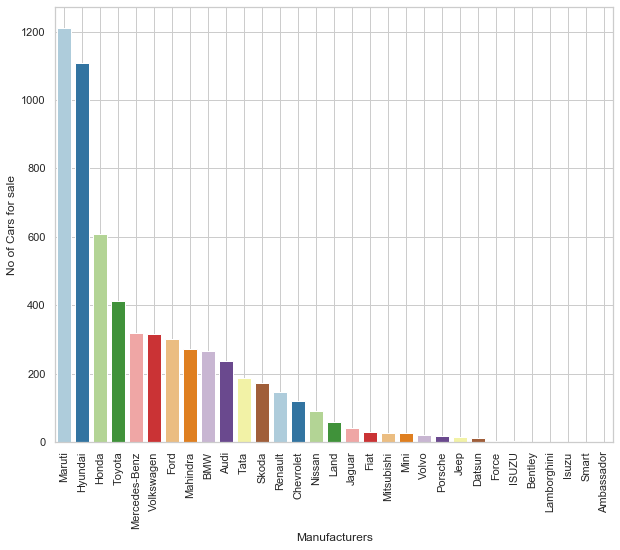

In [48]:
sns.barplot(Manufacturers.index,Manufacturers['Count'],palette = 'Paired')
plt.xticks(rotation = 90)
#plt.rcParams['figure.figsize'] = [15,10]
plt.grid(True)
plt.ylabel('No of Cars for sale')

# Finding the total no of differnet type of fule engines which where kept for sale 

In [51]:
fule_type = data.groupby(['Fuel_Type']).size().sort_values(ascending=False)#.reset_index()
fule_type = pd.DataFrame(fule_type).reset_index()
fule_type = fule_type.rename(columns = {0: 'No of Cars'})
fule_type

,Fuel_Type,No of Cars
0,Diesel,3205
1,Petrol,2746
2,CNG,56
3,LPG,10
4,Electric,2


Text(0, 0.5, 'No of cars')

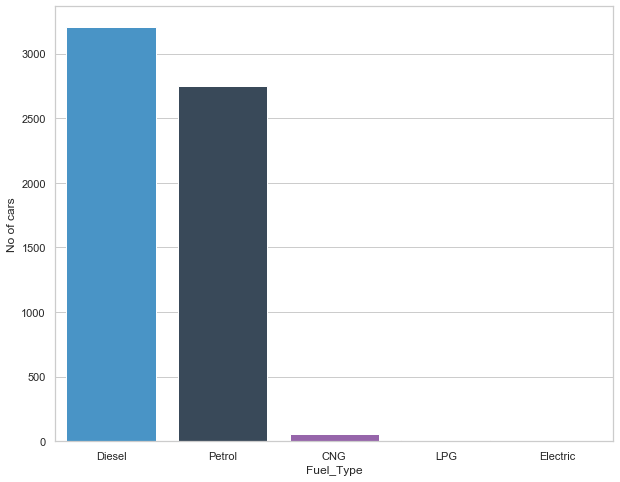

In [65]:
colors = ["#3498db","#34495e","#9b59b6","#e74c3c","#95a5a6"]
sns.barplot(x = 'Fuel_Type',y = 'No of Cars', data = fule_type,palette = colors)
plt.ylabel('No of cars')

In [13]:
top_sold_cars = data.groupby('Name')['Year'].size().sort_values(ascending =False).reset_index()
top = pd.DataFrame(top_sold_cars).head(10)
top = top.rename(columns = {'Year': 'Count'})
top

,Name,Count
0,Mahindra XUV500 W8 2WD,49
1,Maruti Swift VDI,45
2,Honda City 1.5 S MT,34
3,Maruti Swift Dzire VDI,34
4,Maruti Swift VDI BSIV,31
5,Maruti Ritz VDi,30
6,Hyundai i10 Sportz,30
7,Toyota Fortuner 3.0 Diesel,29
8,Honda Amaze S i-Dtech,27
9,Hyundai Grand i10 Sportz,27


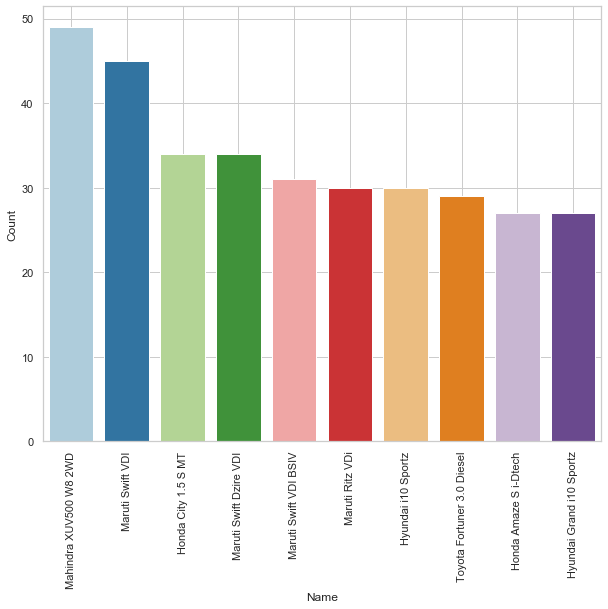

In [49]:
sns.barplot(top['Name'],top['Count'],palette = 'Paired')
plt.xticks(rotation = 90)
plt.grid(True)

most of the vehicles for sale are Mahindra XUV500 W8 2WD and the count is 49

# Identifying the Mileage Distributions 

In [15]:
data['Mileage'] = data['Mileage'].fillna('0 kmpl')

In [16]:
data['Mileage_num']= data['Mileage'].apply(lambda x: float(x.split()[0]))

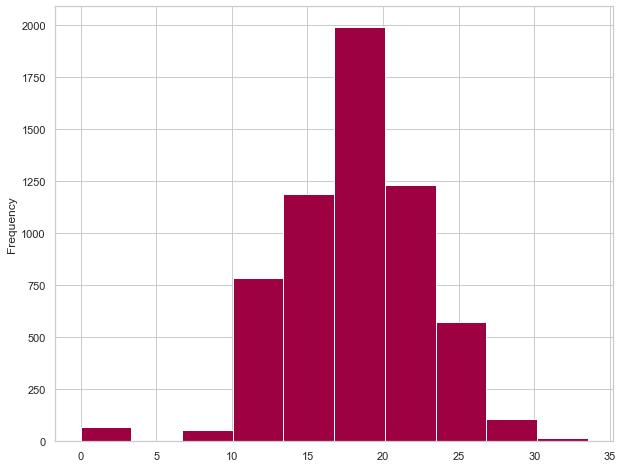

In [78]:
data['Mileage_num'].plot(kind = 'hist',cmap = 'Spectral')

Most of the vehicles mileage ranges between 15 to 25 kmph

# Identifying average mileage of vechiles by type of fuel engine

In [18]:
mileage_fule_pvt = data.pivot_table(index='Fuel_Type',values='Mileage_num',aggfunc='mean')
mileage_fule_pvt

,Mileage_num
Fuel_Type,
CNG,25.418036
Diesel,18.620484
Electric,0.000000
LPG,19.385000
Petrol,17.415204


In [19]:
data.query('Fuel_Type=="Electric"')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturers,Mileage_num
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,0 kmpl,72 CC,41 bhp,5.0,13.58 Lakh,13.00,Mahindra,0.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,0 kmpl,1798 CC,73 bhp,5.0,NaN,12.75,Toyota,0.0


Text(0, 0.5, 'Mileage')

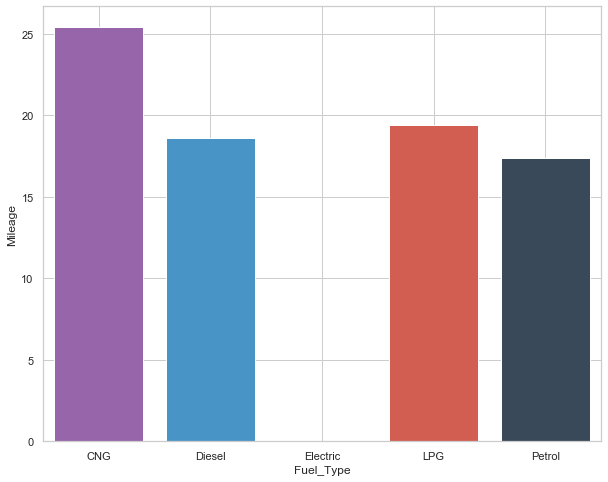

In [84]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
sns.barplot(mileage_fule_pvt.index,mileage_fule_pvt.Mileage_num,palette = colors )
plt.grid(True)
plt.ylabel('Mileage')

* from the above bar plot we can understand that CNG fuel has the highest average mlieage of 26 and fuel type Diesel and Petrol looks almost similar, and for fuel type Electric we dont have data for it and we have imputed it with 0 kmpl
* fuel type LPG has a little difference when compared to Petrol and Diesel

In [21]:
vechiles_year = data['Year'].value_counts()
vechiles_year = pd.DataFrame(vechiles_year).reset_index()
vechiles_year = vechiles_year.rename(columns={'index':'Year','Year':"No of Cars for sale"})
vechiles_year = vechiles_year.sort_values( 'Year',ascending = False)
vechiles_year.head()

,Year,No of Cars for sale
12,2019,102
8,2018,298
4,2017,587
2,2016,741
1,2015,744


In [22]:
data['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

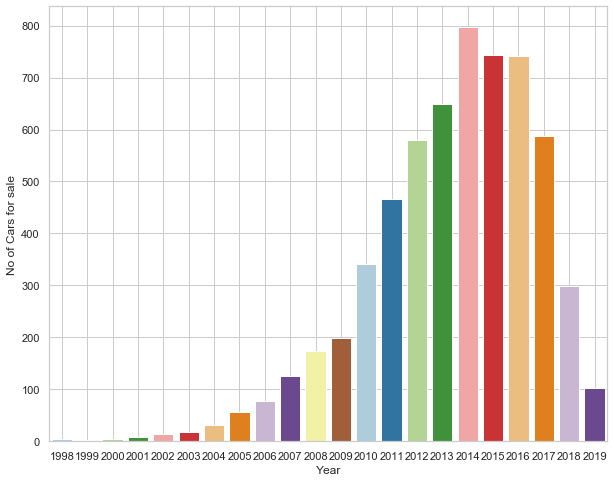

In [83]:
sns.barplot(x='Year',y = 'No of Cars for sale' ,data= vechiles_year,palette = 'Paired')
plt.grid(True)

* this clearly states that the vechicles are been kept for sale after using them for at lest 4 to 5 years 
* we can also observe that sale of vehicles  which are of older than 5 year are gradually decreasing 